In [1]:
from estimators.estimator import Estimator
from rewarders.rewarder import Rewarder
from utils.plots import *
from utils.save import *
from math import log10

In [2]:
self_trig_path = "workspaces/self_triggered"
time_trig_path = "workspaces/time_triggered"

In [3]:
#Load time workspace
pickle_load(time_trig_path, globals(), '_time')
estimator_time.summarize()
rewarder_time.summarize()

estimatorType_time
seeAction_time
seeMeasurement_time
seeEstimate_time
seeTime_time
seeSumAction_time
T_time
threshold_time
windowSize_time
cost_time
estimator_time
rewarder_time
numberSamples_train_time
T_train_time
numberSamples_valid_time
T_valid_time
objectives_train_time
measurements_train_time
objectives_valid_time
measurements_valid_time
n_epochs_agent_time
cumulatedRewards_valid_time
meanReward_valid_time
numberSamples_test_time
T_test_time
objectives_test_time
measurements_test_time
sigmas_test_time
rewards_test_time
estimates_test_time
meanReward_test_time
sumSigmas_test_time
numberMeasurements_time
sigmas_regular_time
rewards_regular_time
estimates_regular_time
meanReward_regular_time
load done
Kalman estimator
  observationsDimensions: [(1,), (1,)]
  seeAction= False
  seeMeasurement= False
  seeEstimate= False
  seeTime= True
  seeCovariance= False
  seeSumAction= True
Threshold rewarder
  window size: 13
  threshold: 4
  cost: 50
  number of measures in the window: 4


In [4]:
#Load self triggered workspace and retrieve data
pickle_load(self_trig_path, globals(), '_self')
estimator_self.summarize()
rewarder_self.summarize()

estimatorType_self
seeAction_self
seeMeasurement_self
seeEstimate_self
seeTime_self
seeSumAction_self
T_self
threshold_self
windowSize_self
cost_self
estimator_self
rewarder_self
numberSamples_train_self
T_train_self
numberSamples_valid_self
T_valid_self
objectives_train_self
measurements_train_self
objectives_valid_self
measurements_valid_self
n_epochs_agent_self
cumulatedRewards_valid_self
meanReward_valid_self
numberSamples_test_self
T_test_self
objectives_test_self
measurements_test_self
sigmas_test_self
rewards_test_self
estimates_test_self
meanReward_test_self
sumSigmas_test_self
numberMeasurements_self
sigmas_regular_self
rewards_regular_self
estimates_regular_self
meanReward_regular_self
load done
Kalman estimator
  observationsDimensions: [(12, 1), (1,), (1,)]
  seeAction= False
  seeMeasurement= True
  seeEstimate= False
  seeTime= True
  seeCovariance= False
  seeSumAction= True
Threshold rewarder
  window size: 13
  threshold: 4
  cost: 50
  number of measures in the window

In [5]:
#Check if same data and options
test_time = [cost_time, threshold_time, windowSize_time, T_time]
test_self = [cost_self, threshold_self, windowSize_self, T_self]

if not test_self == test_time:
    print("Not the same options")      
if not ( np.array_equal(objectives_test_self,objectives_test_time) and np.array_equal(measurements_test_self,measurements_test_time) ):
    print("Not the same test dataset")
if not ( np.array_equal(objectives_valid_self,objectives_valid_time) and np.array_equal(measurements_valid_self,measurements_valid_time) ):
    print("Not the same valid dataset")
if seeMeasurement_time:
    print("Measurements are seen in time setting")
if not seeMeasurement_self:
    print("Measurements are not seen in self setting")

4.0
4.0
4


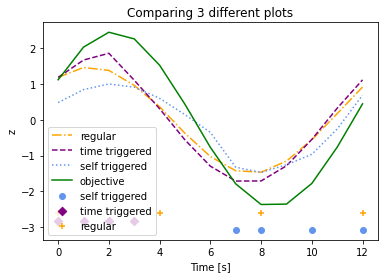

In [6]:
#Compare estimations
import matplotlib.pyplot as plt
from utils.plots import sigma_to_points

idx = 0
T = T_self

print(sum(sigmas_test_self[idx]))
print(sum(sigmas_test_time[idx]))
print(sum(sigmas_regular_time[idx]))
    
plotEstimateSigma(objectives_test_time, estimates_test_self, estimates_test_time,
                  sigmas_test_self, sigmas_test_time, sigmas_regular_time,
                   estimates_regular_time, idx, T, save=False,
                   filename='estimation_comp.png')

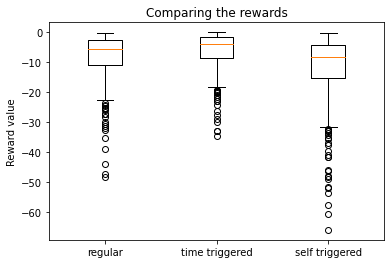

In [7]:
#Reward plot
fig_reward=plt.figure()
plt.title("Comparing the rewards")

cumulativeRewards_reg = np.sum(rewards_regular_self, axis=-1)
cumulativeRewards_time = np.sum(rewards_test_time, axis=-1)
cumulativeRewards_self = np.sum(rewards_test_self, axis=-1)

boxplot_data = [cumulativeRewards_reg, cumulativeRewards_time,
                cumulativeRewards_self]
names = ["regular", "time triggered", "self triggered"]

plt.boxplot(boxplot_data, labels=names)
plt.ylabel("Reward value")
plt.show()
fig_reward.savefig('figs/histo_rewards.eps')

In [8]:
gain_time = []
gain_self = []
for i in range(len(cumulativeRewards_reg)):
    gain_time.append(log10(cumulativeRewards_reg[i]/cumulativeRewards_time[i]))
    gain_self.append(log10(cumulativeRewards_reg[i]/cumulativeRewards_self[i]))

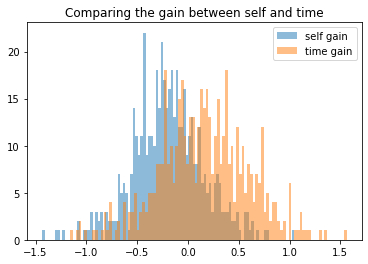

In [9]:
nbins = 100

pyplot.title("Comparing the gain between time and self")
pyplot.hist(gain_time, nbins, alpha=0.5, label='time gain')
pyplot.hist(gain_self, nbins, alpha=0.5, label='self gain')
pyplot.legend(loc='upper right')
pyplot.show()

In [10]:
#Data over gain
from statistics import mean, median

mean_gain_self = mean(gain_self)
mean_std_gain_self = np.std(gain_self)
median_gain_self = median(gain_self)
positive_gain_self = len([x for x in gain_self if x > 0])/len(gain_self)

mean_gain_time = mean(gain_time)
mean_std_gain_time = np.std(gain_time)
median_gain_time = median(gain_time)
positive_gain_time = len([x for x in gain_time if x > 0])/len(gain_time)

In [11]:
print("self gain mean (std): " + str(mean_gain_self) + ' (' + str(mean_std_gain_self) + ')')
print("self gain median: " + str(median_gain_self))
print("self positive proportion gain: " + str(positive_gain_self))

print("self gain mean (std): " + str(mean_gain_time) + ' (' + str(mean_std_gain_time) + ')')
print("self gain median: " + str(median_gain_time))
print("self positive proportion gain: " + str(positive_gain_time))

self gain mean (std): -0.1929231308612927 (0.34838782618060976)
self gain median: -0.202338734743573
self positive proportion gain: 0.268
self gain mean (std): 0.15386866227491033 (0.4375495985248217)
self gain median: 0.15271385594880155
self positive proportion gain: 0.64


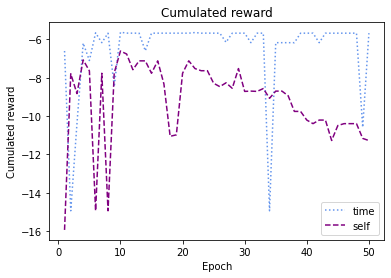

In [12]:
#Rewards per epoch
reward_data = [np.mean(cumulatedRewards_valid_time,axis=1), np.mean(cumulatedRewards_valid_self,axis=1)]

plotMultipleCumulatedRewards(reward_data, save=False, filename='figs/rewards_per_epoch.eps')